# Water Quality - Every Drop Matters (*Qualidade da Água - Cada Gota Conta*)
- Cidades do Mundo: Poluição da Água e Qualidade do Ar - 2020.<br>
DataSet: (https://www.kaggle.com/datasets/patricklford/water-and-air-quality?select=Cities1.csv)

## Bibliotecas

In [1]:
# !pip install pandas
# !pip install seaborn
# !pip install numpy
# !pip install scipy
# !pip install matplotlib

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, ttest_ind

## Paletas de cores

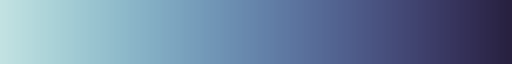

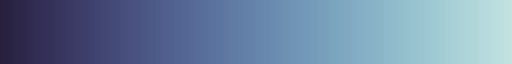

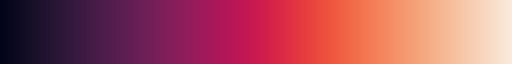

In [3]:
ocean_palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
reverse_ocean_palette = sns.color_palette("ch:start=.2,rot=-.3_r", as_cmap=True)
weong_ocean_palette = sns.color_palette("rocket", as_cmap=True)

display(ocean_palette, reverse_ocean_palette, weong_ocean_palette)

## Início e Processamento prévio de Dados

In [4]:
df_cities = pd.read_csv('C:/Users/Mateus Iago/Desktop/GLOBAL SOLUTION/GS - DATA_SCIENCE/Cities1.csv')
display(df_cities.head(5), df_cities.shape)

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435


(3963, 5)

### Variáveis categóricas:
- City (Cidade)<br>
- Region (Região)<br>
- Country (País)<br>
### Variáveis numéricas contínuas:
- AirQuality (Qualidade do Ar)<br>
- WaterPollution (Poluição de Água)<br>

- A qualidade do ar varia de 0 (má qualidade) a 100 (qualidade excelente).<br>
- A poluição da água varia de 0 (sem poluição) a 100 (poluição extrema).

## Conhecendo o Data Set

In [5]:
df_cities = df_cities = df_cities.drop(columns=['AirQuality'])
display(df_cities.head(5), df_cities.shape)

,City,Region,Country,WaterPollution
0,New York City,New York,United States of America,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,49.107143
2,San Francisco,California,United States of America,43.000000
3,Berlin,NaN,Germany,28.612717
4,Los Angeles,California,United States of America,61.299435


(3963, 4)

In [6]:
# Contar valores nulos em cada coluna
null_counts = df_cities.isnull().sum()
print(null_counts)

City                0
Region            425
Country             0
WaterPollution      0
dtype: int64


In [7]:
print(df_cities.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3538 non-null   object 
 2   Country         3963 non-null   object 
 3   WaterPollution  3963 non-null   float64
dtypes: float64(1), object(3)
memory usage: 124.0+ KB
None


In [8]:
#descrições básicas do dataset completo
df_cities.describe().T

,count,mean,std,min,25%,50%,75%,max
WaterPollution,3963.0,44.635372,25.66391,0.0,25.0,50.0,57.719393,100.0


In [9]:
#Descobrindo em quantos paises foram colhidos dados para o dataset. No caso, 177 paises diferentes
print(df_cities['Country'].nunique())
#Descobrindo em quantas regioes foram colhidos dados para o dataset. No caso, 1152 regiões distintas
print(df_cities['Region'].nunique()) 
##Descobrindo em quantas cidades foram colhidos dados para o dataset. No caso, 3796 regiões distintas
print(df_cities['City'].nunique()) 

177
1152
3796


## Top 10 paises com maiores observações

In [10]:
df_cities_counts = pd.DataFrame(df_cities['Country'].value_counts())
df_cities_counts.head(10)

,Country
United States of America,842
People's Republic of China,238
United Kingdom,170
Canada,157
India,154
Germany,124
Brazil,103
Poland,94
Russia,86
Spain,78


In [11]:
porcentagem_country = (df_cities_counts.head(10).sum()/df_cities_counts.sum())*100
porcentagem_country

Country    51.627555
dtype: float64

In [12]:
country_top_10 = ["United States of America", "People's Republic of China", "United Kingdom", "Canada", "India", "Germany", "Brazil", "Poland", "Russia", "Spain"]
df_filtrado = df_cities[df_cities['Country'].isin(country_top_10)]
df_filtrado

,City,Region,Country,WaterPollution
0,New York City,New York,United States of America,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,49.107143
2,San Francisco,California,United States of America,43.000000
3,Berlin,NaN,Germany,28.612717
4,Los Angeles,California,United States of America,61.299435
...,...,...,...,...
3956,Palencia,Castile and Leon,Spain,37.500000
3959,Cordoba,Andalusia,Spain,8.333333
3960,Vic,Catalonia,Spain,0.000000
3961,Segovia,Castile and Leon,Spain,0.000000


In [13]:
media_water_pollution = df_filtrado.groupby('Country')['WaterPollution'].mean().reset_index()
media_water_pollution = media_water_pollution.sort_values(by='WaterPollution')
media_water_pollution


,Country,WaterPollution
8,United Kingdom,25.791133
1,Canada,32.551674
2,Germany,33.495474
7,Spain,36.747945
9,United States of America,40.052397
5,Poland,43.860232
0,Brazil,52.747595
4,People's Republic of China,54.617488
6,Russia,57.089550
3,India,62.491712


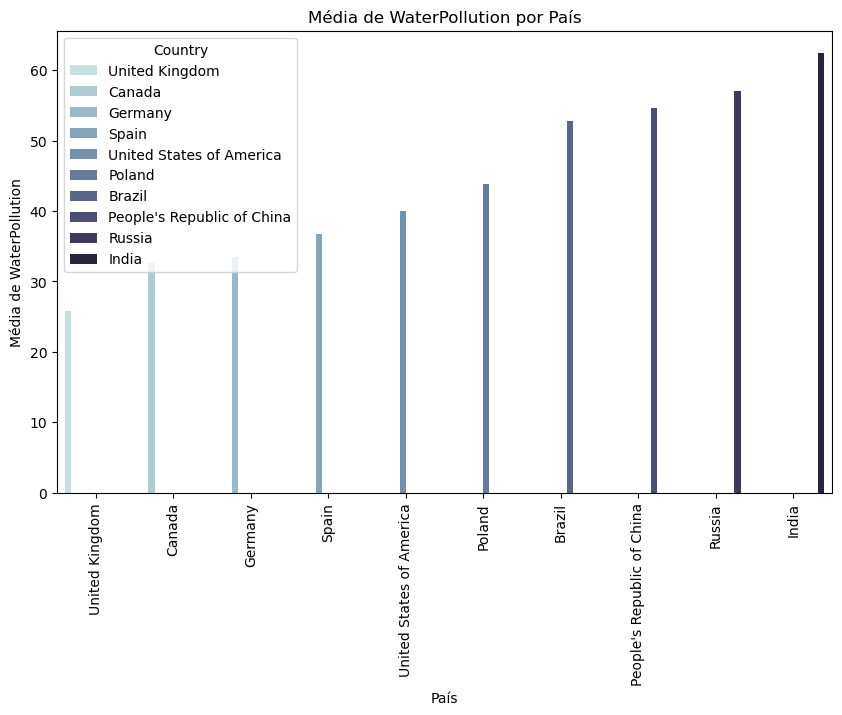

In [14]:
sns.set_style()
plt.figure(figsize=(10, 6))
sns.barplot(x='Country',hue='Country', y='WaterPollution', data=media_water_pollution, palette='ch:start=.2,rot=-.3')
plt.title('Média de WaterPollution por País')
plt.xlabel('País')
plt.ylabel('Média de WaterPollution')
plt.xticks(rotation=90)
plt.show()

## Top 40 Paises com maiores observações

In [15]:
country_top_40 = ["United States of America", "People's Republic of China", "United Kingdom", "Canada", "India", "Germany", "Brazil", "Poland", "Russia", "Spain", "Italy", "France", "South Africa", "Thailand", "Japan", "Indonesia", "Greece", "Australia", "South Korea", "Iran", "Belgium", "Malaysia", "Switzerland", "Chile", "Pakistan", "Finland"]
df_filtrado_top_40 = df_cities[df_cities['Country'].isin(country_top_40)]
df_mean_Country = df_filtrado_top_40.pivot_table(values=['WaterPollution'], index=['Country'], aggfunc=['mean','median'])
df_mean_Country = df_mean_Country.sort_values(by=('mean', 'WaterPollution'), ascending=False)
df_mean_Country

,mean,median
,WaterPollution,WaterPollution
Country,,
Pakistan,67.889869,66.666667
India,62.491712,63.186572
Malaysia,61.137062,58.333333
Russia,57.089550,54.940828
South Africa,56.744204,57.746479
People's Republic of China,54.617488,50.000000
Thailand,54.360891,50.000000
Brazil,52.747595,50.000000


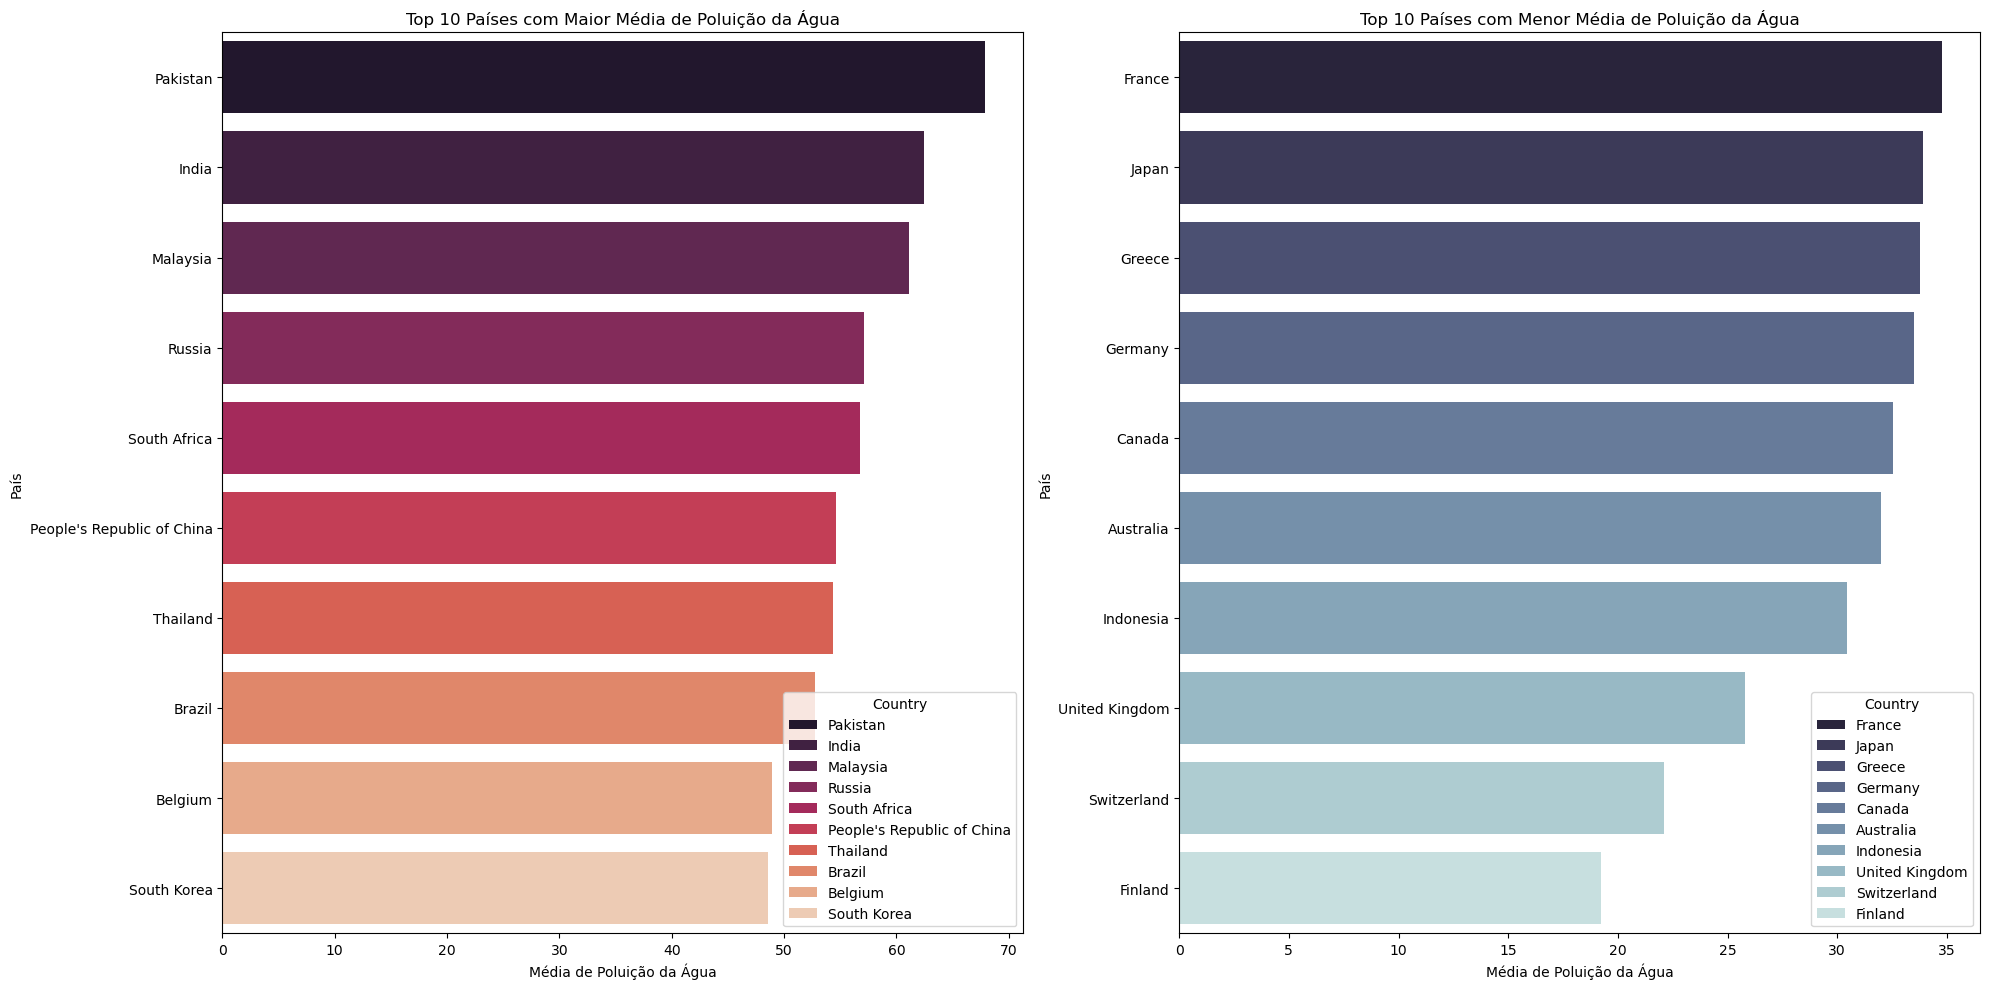

In [16]:
top_10 = df_mean_Country.head(10).reset_index()
bottom_10 = df_mean_Country.tail(10).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x=('mean', 'WaterPollution'), y='Country', hue='Country', data=top_10, ax=axes[0], palette='rocket', dodge=False)
axes[0].set_title('Top 10 Países com Maior Média de Poluição da Água')
axes[0].set_xlabel('Média de Poluição da Água')
axes[0].set_ylabel('País')

sns.barplot(x=('mean', 'WaterPollution'), y='Country', hue='Country', data=bottom_10, ax=axes[1], palette='ch:start=.2,rot=-.3_r', dodge=False)
axes[1].set_title('Top 10 Países com Menor Média de Poluição da Água')
axes[1].set_xlabel('Média de Poluição da Água')
axes[1].set_ylabel('País')
plt.tight_layout()
plt.show()

## Brasil e Regiões

In [17]:
df_brasil = df_cities[df_cities['Country'].isin(['Brazil'])]
display(df_brasil.head(103), df_brasil.shape)

,City,Region,Country,WaterPollution
16,Sao Paulo,Sao Paulo,Brazil,73.717949
246,Brasilia,Federal District,Brazil,38.043478
390,Osasco,Sao Paulo,Brazil,66.666667
399,Curitiba,Parana,Brazil,48.913043
511,Rio de Janeiro,Rio de Janeiro,Brazil,77.241379
...,...,...,...,...
3621,Linhares,Espirito Santo,Brazil,100.000000
3632,Rio das Ostras,Rio de Janeiro,Brazil,100.000000
3889,Belem,Para,Brazil,93.750000
3916,Osorio,Rio Grande do Sul,Brazil,75.000000


(103, 4)

In [18]:
df_sp = df_brasil[df_brasil['Region'] == 'Sao Paulo']
df_sp.head(32)

,City,Region,Country,WaterPollution
16,Sao Paulo,Sao Paulo,Brazil,73.717949
390,Osasco,Sao Paulo,Brazil,66.666667
1365,Santos,Sao Paulo,Brazil,18.750000
1735,Campinas,Sao Paulo,Brazil,48.333333
1834,Sao Bernardo do Campo,Sao Paulo,Brazil,66.666667
1835,Guarulhos,Sao Paulo,Brazil,21.875000
1877,Ribeirao Preto,Sao Paulo,Brazil,61.111111
1880,Sorocaba,Sao Paulo,Brazil,41.666667
1909,Sao Jose dos Campos,Sao Paulo,Brazil,26.470588
1910,Santo Andre,Sao Paulo,Brazil,0.000000


In [19]:
print(df_brasil.isnull().sum())

City              0
Region            0
Country           0
WaterPollution    0
dtype: int64


In [20]:
df_brazil_counts = pd.DataFrame(df_brasil['Region'].value_counts())
df_brazil_counts.head(22)

,Region
Sao Paulo,32
Rio de Janeiro,14
Rio Grande do Sul,10
Parana,8
Minas Gerais,7
Santa Catarina,6
Pernambuco,4
Espirito Santo,4
Bahia,3
Mato Grosso do Sul,2


In [21]:
states_brazil = df_brasil['Region'].unique().tolist()
df_filtrado_states_brazil = df_cities[df_cities['Region'].isin(states_brazil)]
df_mean_states_brazil = df_filtrado_states_brazil.pivot_table(values=['WaterPollution'], index=['Region'], aggfunc=['mean'])
df_mean_states_brazil = df_mean_states_brazil.sort_values(by=('mean', 'WaterPollution'), ascending=False)
df_mean_states_brazil.head(22)

,mean
,WaterPollution
Region,
Maranhao,100.000000
Para,93.750000
Piaui,75.000000
Bahia,71.271930
Espirito Santo,67.916667
Mato Grosso do Sul,66.071429
Pernambuco,63.104839
Rio de Janeiro,62.822436


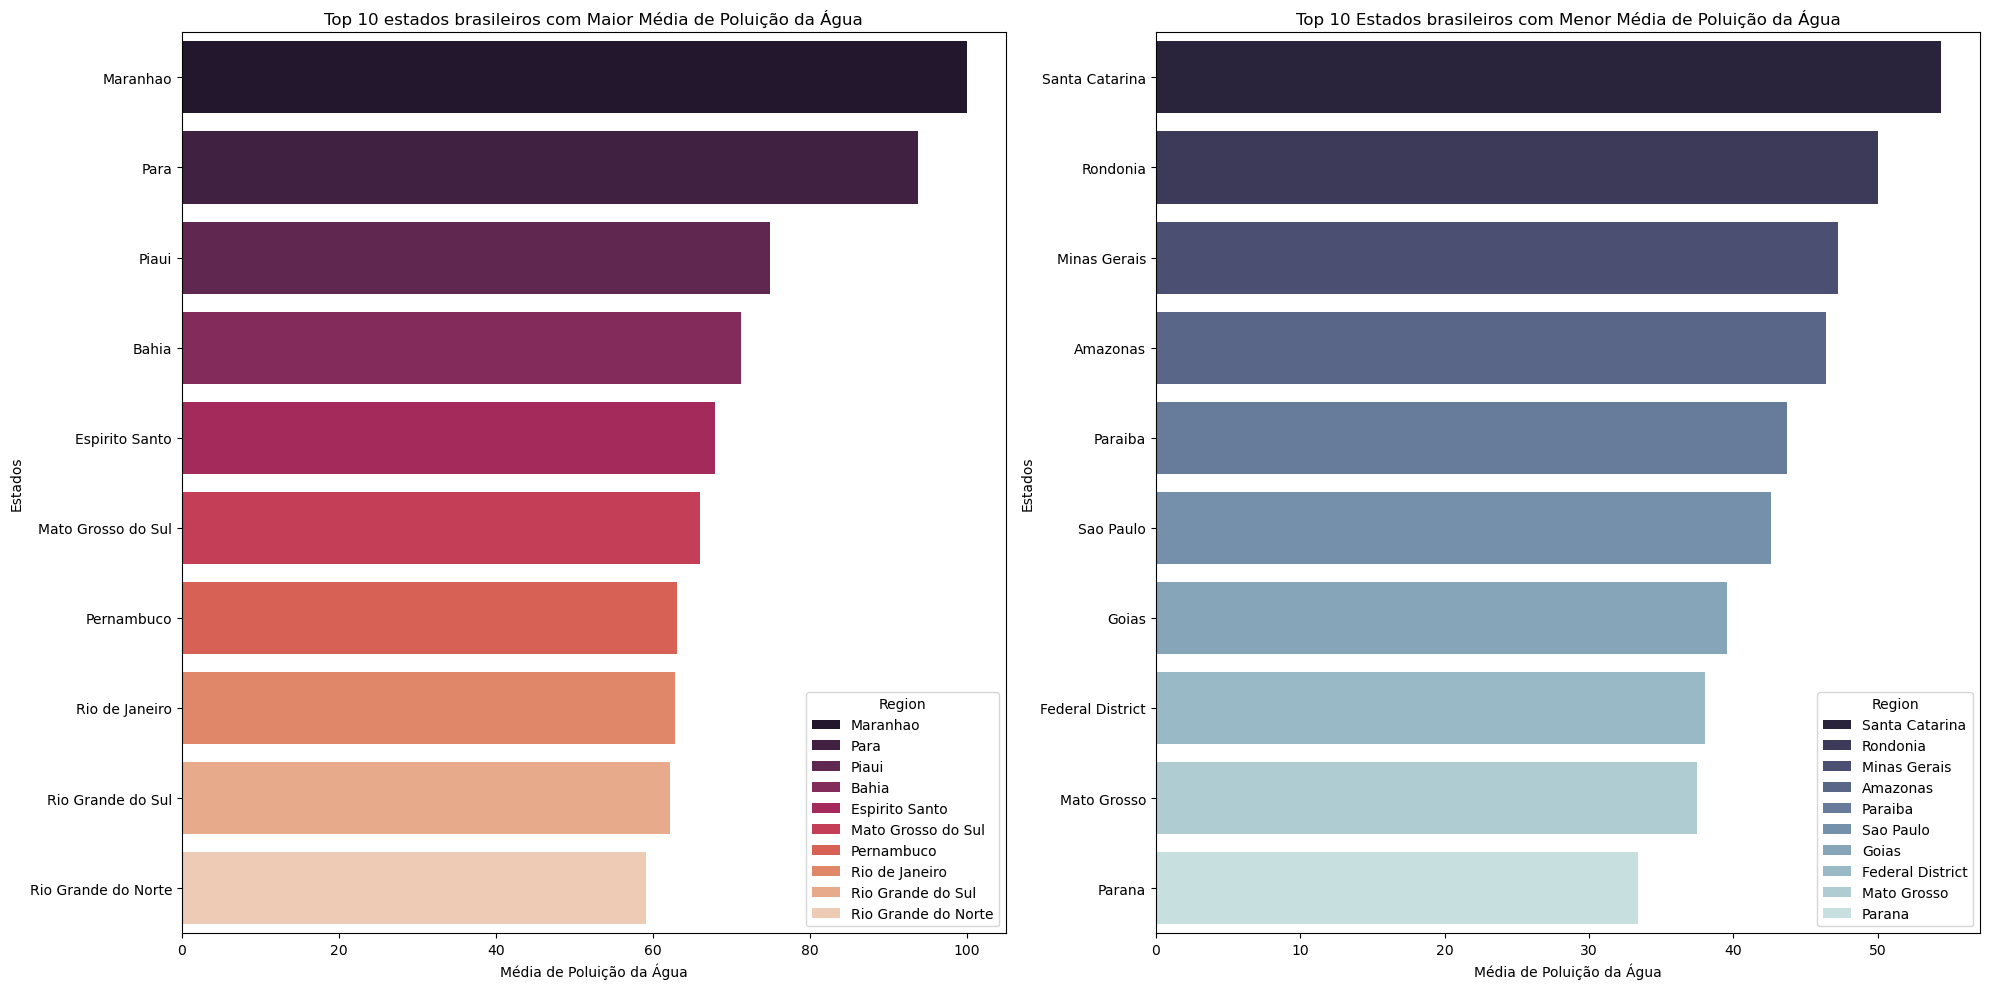

In [22]:
top_brazil = df_mean_states_brazil.head(10).reset_index()
bottom_brazil = df_mean_states_brazil.tail(10).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x=('mean', 'WaterPollution'), y='Region', hue='Region', data=top_brazil, ax=axes[0], palette='rocket', dodge=False)
axes[0].set_title('Top 10 estados brasileiros com Maior Média de Poluição da Água')
axes[0].set_xlabel('Média de Poluição da Água')
axes[0].set_ylabel('Estados')

sns.barplot(x=('mean', 'WaterPollution'), y='Region', hue='Region', data=bottom_brazil, ax=axes[1], palette='ch:start=.2,rot=-.3_r', dodge=False)
axes[1].set_title('Top 10 Estados brasileiros com Menor Média de Poluição da Água')
axes[1].set_xlabel('Média de Poluição da Água')
axes[1].set_ylabel('Estados')
plt.tight_layout()
plt.show()

## Estados Unidos e Regiões

In [23]:
df_eua = df_cities[df_cities['Country'].isin(['United States of America'])]
display(df_eua.head(5), df_eua.shape)

,City,Region,Country,WaterPollution
0,New York City,New York,United States of America,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,49.107143
2,San Francisco,California,United States of America,43.000000
4,Los Angeles,California,United States of America,61.299435
12,Alexandria,Virginia,United States of America,46.153846


(842, 4)

In [24]:
print(df_eua.isnull().sum())

City              0
Region            0
Country           0
WaterPollution    0
dtype: int64


In [25]:
df_eua_counts = pd.DataFrame(df_eua['Region'].value_counts())
df_eua_counts.head(50)

,Region
California,122
Texas,51
Florida,48
Georgia,31
New York,31
Washington,29
North Carolina,27
Indiana,26
Illinois,26
Michigan,24


In [26]:
states_eua = df_eua['Region'].unique().tolist()
df_filtrado_states_eua = df_cities[df_cities['Region'].isin(states_eua)]
df_mean_states_eua = df_filtrado_states_eua.pivot_table(values=['WaterPollution'], index=['Region'], aggfunc=['mean'])
df_mean_states_eua = df_mean_states_eua.sort_values(by=('mean', 'WaterPollution'), ascending=False)
df_mean_states_eua.head(50)

,mean
,WaterPollution
Region,
Delaware,71.875000
Louisiana,61.268601
New Jersey,58.461538
Kentucky,52.332938
New Mexico,51.945930
South Dakota,51.884921
West Virginia,51.136364
Maine,50.669643


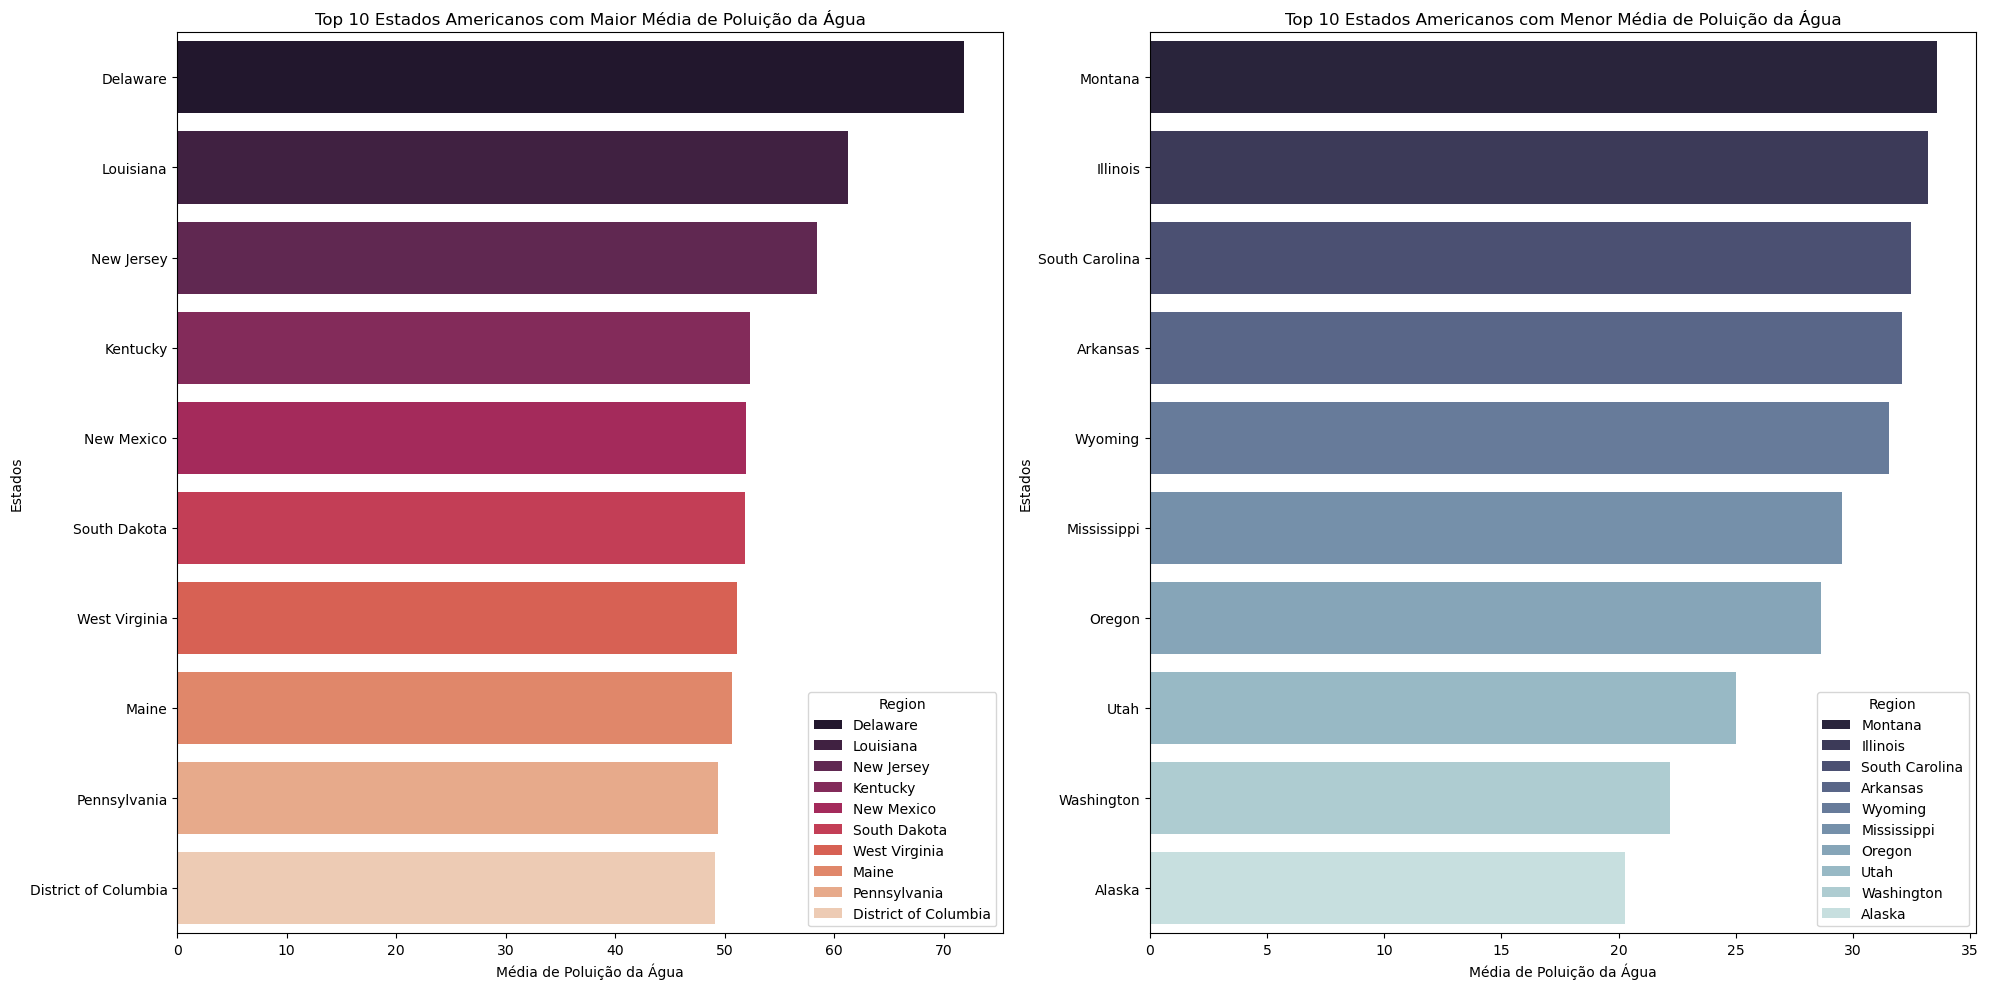

In [27]:
top_eua = df_mean_states_eua.head(10).reset_index()
bottom_eua = df_mean_states_eua.tail(10).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x=('mean', 'WaterPollution'), y='Region', hue='Region', data=top_eua, ax=axes[0], palette='rocket', dodge=False)
axes[0].set_title('Top 10 Estados Americanos com Maior Média de Poluição da Água')
axes[0].set_xlabel('Média de Poluição da Água')
axes[0].set_ylabel('Estados')

sns.barplot(x=('mean', 'WaterPollution'), y='Region', hue='Region', data=bottom_eua, ax=axes[1], palette='ch:start=.2,rot=-.3_r', dodge=False)
axes[1].set_title('Top 10 Estados Americanos com Menor Média de Poluição da Água')
axes[1].set_xlabel('Média de Poluição da Água')
axes[1].set_ylabel('Estados')
plt.tight_layout()
plt.show()

## Teste de Hipótese

In [28]:
#Hipótese sobre a Poluição da Água e Desenvolvimento Socioeconômico:

#H0 (Hipótese Nula): Não há diferença significativa nos níveis de poluição da água entre países desenvolvidos (norte do mapa) e países emergentes (sul do mapa).
#H1 (Hipótese Alternativa): Há uma diferença significativa nos níveis de poluição da água entre países desenvolvidos (norte do mapa) e países emergentes (sul do mapa).

In [29]:
#Carregando o dataset novamente
df = pd.read_csv('C:/Users/Mateus Iago/Desktop/GLOBAL SOLUTION/GS - DATA_SCIENCE/Cities1.csv')

#Separando os paises do norte e do sul do mundo
northern_countries = ['Canada', 'United Kingdom', 'Germany', 'France', 'United States of America','Japan','Russia'] 
southern_countries = ['Brazil', 'India', 'South Africa', 'Indonesia', 'Malaysia', 'Pakistan','Thailand','Chile','Iran']

#Criando a coluna 'hemisphere' no  dataset original
df['hemisphere'] = df['Country'].apply(lambda x: 'North' if x in northern_countries else ('South' if x in southern_countries else 'Other'))

print("Distribuição dos dados após classificação:")
print(df['hemisphere'].value_counts())

#Filtando o dataset a partir de um data frame somente com os paises do hemisferio sul e norte selecionados
df_hemisphere = df[df['hemisphere'].isin(['North', 'South'])]

#Separando em dois grupos
north_data = df_hemisphere[df_hemisphere['hemisphere'] == 'North']['WaterPollution']
south_data = df_hemisphere[df_hemisphere['hemisphere'] == 'South']['WaterPollution']

Distribuição dos dados após classificação:
Other    1987
North    1464
South     512
Name: hemisphere, dtype: int64


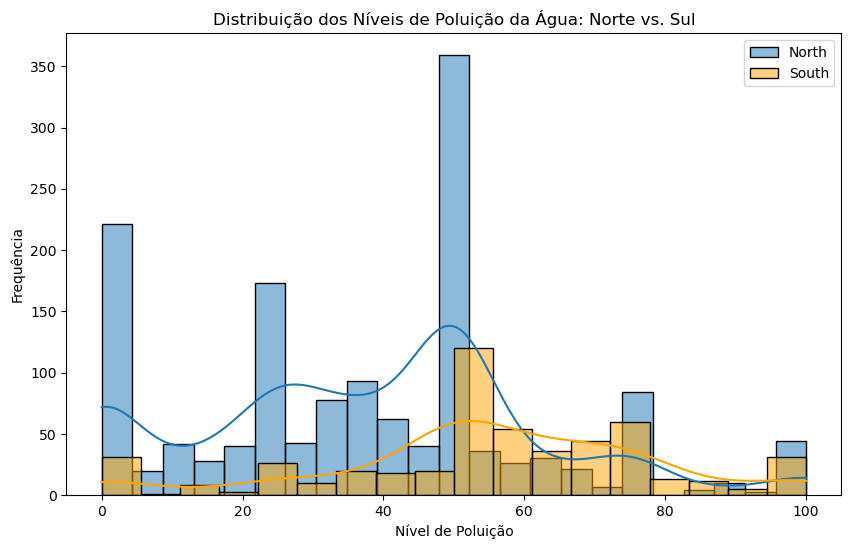

In [30]:
#Visualização Gráfica dos dados
plt.figure(figsize=(10, 6))
sns.histplot(north_data, label='North', kde=True)
sns.histplot(south_data, label='South', color='orange', kde=True)
plt.legend()
plt.title('Distribuição dos Níveis de Poluição da Água: Norte vs. Sul')
plt.xlabel('Nível de Poluição')
plt.ylabel('Frequência')
plt.show()

In [31]:
# Realizar o teste t de Student
t_stat, p_value = ttest_ind(north_data, south_data, equal_var=False)

# Interpretação dos resultados
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa nos níveis de poluição da água entre os países do Norte e do Sul.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não há uma diferença significativa nos níveis de poluição da água entre os países do Norte e do Sul.")


Rejeitamos a hipótese nula: Há uma diferença significativa nos níveis de poluição da água entre os países do Norte e do Sul.


In [32]:
#Hipótese sobre Desigualdade na Distribuição das Observações

#H0 (Hipótese Nula): A distribuição das observações entre os Paises não é significativamente diferente.
#H1 (Hipótese Alternativa): A distribuição das observações entre os estados é significativamente diferente.

from scipy.stats import kruskal

#Carregando o dataset novamente
df = pd.read_csv('C:/Users/Mateus Iago/Desktop/GLOBAL SOLUTION/GS - DATA_SCIENCE/Cities1.csv')

# Realizar o teste de Kruskal-Wallis para comparar as distribuições das observações de poluição da água entre os diferentes paises
statistic, p_value = kruskal(*[group['WaterPollution'] for name, group in df.groupby('Country')])

# Exibir o resultado do teste
print("Resultado do Teste de Kruskal-Wallis:")
print(f"Estatística do Teste: {statistic}")
print(f"Valor-p (p-value): {p_value}")

# Interpretar os resultados
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Rejeitamos a hipótese nula.")
    print("Há evidências estatísticas suficientes para suportar a hipótese alternativa.")
else:
    print("Não rejeitamos a hipótese nula.")
    print("Não há evidências estatísticas suficientes para suportar a hipótese alternativa.")


Resultado do Teste de Kruskal-Wallis:
Estatística do Teste: 1035.2945103979266
Valor-p (p-value): 1.1627683913927116e-121
Rejeitamos a hipótese nula.
Há evidências estatísticas suficientes para suportar a hipótese alternativa.
